Name: Janak Mandavgade

Sec : A

Roll no : 43  

Batch : A2

Subject : ML Lab

Aim : TO implement the backpropagation neural network for XOR gate.

Epoch 0: Error = 0.4965166892314006
Epoch 1000: Error = 0.49480024625871166
Epoch 2000: Error = 0.45437258441896333
Epoch 3000: Error = 0.38516616041394175
Epoch 4000: Error = 0.29167735388074734
Epoch 5000: Error = 0.1889466783875004
Epoch 6000: Error = 0.13893516700258499
Epoch 7000: Error = 0.11305362278740964
Epoch 8000: Error = 0.09720895712909862
Epoch 9000: Error = 0.08637316869386068


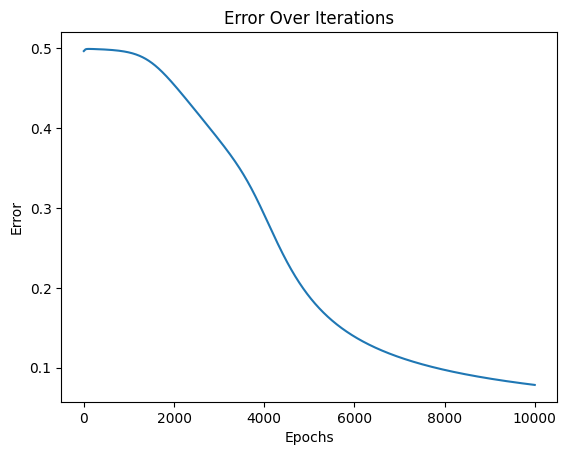

Final Input-Hidden Weights:
[[-2.81233868  2.8152583   4.15522584  5.13927213]
 [ 5.56987066 -1.42712777 -2.04152766  5.00461866]]
Final Hidden-Output Weights:
[[-7.00687405]
 [-3.34219893]
 [-4.80940816]
 [10.79156091]]

Test Results:
Input: [0 0] - Predicted Output: 0.10124563999007326 - Actual Output: 0
Input: [0 1] - Predicted Output: 0.926889769227548 - Actual Output: 1
Input: [1 0] - Predicted Output: 0.9200594771632142 - Actual Output: 1
Input: [1 1] - Predicted Output: 0.059327894429251946 - Actual Output: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

np.random.seed(42)

input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

input_hidden_weights = np.random.uniform(size=(input_size, hidden_size))
hidden_output_weights = np.random.uniform(size=(hidden_size, output_size))

errors = []

for epoch in range(epochs):
    hidden_layer_input = np.dot(X, input_hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, hidden_output_weights)
    output_layer_output = sigmoid(output_layer_input)

    error = y - output_layer_output

    errors.append(np.mean(np.abs(error)))

    delta_output = error * sigmoid_derivative(output_layer_output)
    error_hidden = delta_output.dot(hidden_output_weights.T)
    delta_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)
    hidden_output_weights += hidden_layer_output.T.dot(delta_output) * learning_rate
    input_hidden_weights += X.T.dot(delta_hidden) * learning_rate
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Error = {np.mean(np.abs(error))}")

plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error Over Iterations')
plt.show()

print("Final Input-Hidden Weights:")
print(input_hidden_weights)
print("Final Hidden-Output Weights:")
print(hidden_output_weights)

print("\nTest Results:")
for i in range(len(X)):
    hidden_layer_input = np.dot(X[i], input_hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, hidden_output_weights)
    output_layer_output = sigmoid(output_layer_input)

    print(f"Input: {X[i]} - Predicted Output: {output_layer_output[0]} - Actual Output: {y[i][0]}")
